<a href="https://colab.research.google.com/github/ugurklc/Hands-on-ML/blob/main/Ch_10_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np

In [71]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [72]:
from tensorflow import keras
keras.__version__

'2.8.0'

# **Build an image classifier using MNIST dataset**

In [73]:
# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist

In [74]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [75]:
# Lets check the datasets dimensions
print('X_train_full shape :' , X_train_full.shape)
print('y_train_full shape :' , y_train_full.shape)
print('X_test shape :' , X_test.shape)
print('y_test shape :' , y_test.shape)

X_train_full shape : (60000, 28, 28)
y_train_full shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


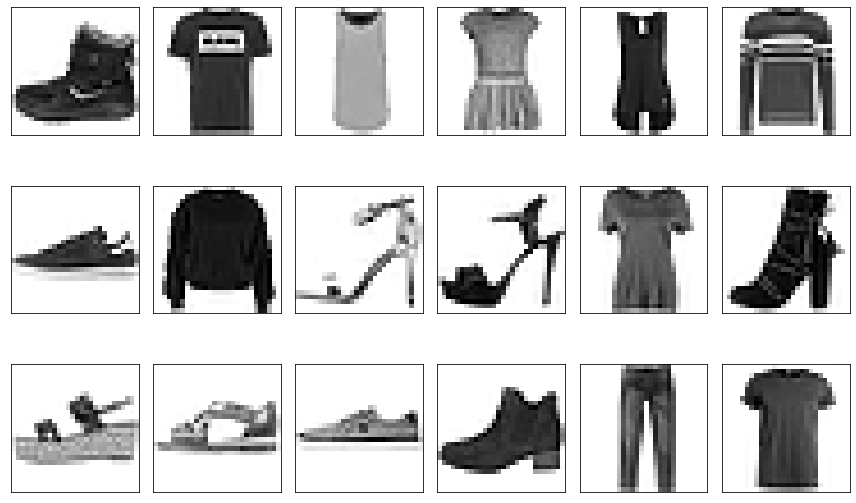

In [76]:
# Lets see some example images
import matplotlib.pyplot as plt

some_images = X_train_full[0:18,:,:]

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i , ax in enumerate(axs.flat):
  ax.imshow(some_images[i], cmap='gray_r')

plt.tight_layout()
plt.show()

The pixel intensities of the imagesare ranged from 0 to 255. Lets scale them down to 0-1 by dividing them by 255. Gradient descent will work better on the scaled data.

In [77]:
X_train_full = X_train_full / 255.0

By default, the Keras MNIST dataset is loaded as train and test. Split the train set into train and validation set by setting the first 5000 instances as the validation set. 

In [78]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Get the class names of the dataset.

In [79]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [80]:
print("The class name '", class_names[y_train[0]], "' is represented as ", y_train[0])

The class name ' Coat ' is represented as  4


Create the model using Keras' sequential API

In [81]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


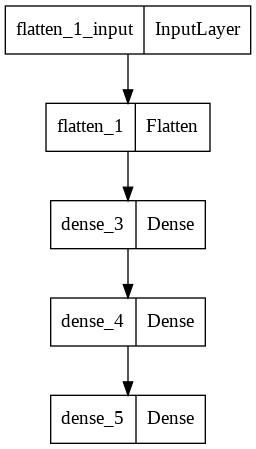

In [83]:
keras.utils.plot_model(model)

In [84]:
model.layers

In [85]:
# Check the layer weights and biases
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.01894912, -0.06234428,  0.01197869, ..., -0.03362288,
        -0.05548789,  0.03051423],
       [-0.06361271, -0.06768101,  0.02579878, ...,  0.02631649,
         0.03840414, -0.02740601],
       [ 0.06534171,  0.07260175, -0.01028811, ..., -0.03607177,
        -0.04280096, -0.0526071 ],
       ...,
       [-0.00208706,  0.02809149, -0.07105149, ...,  0.02938267,
        -0.03288539, -0.01616697],
       [-0.01399396, -0.02518265, -0.04811783, ...,  0.05996777,
        -0.06286079, -0.03818045],
       [-0.05380317,  0.046226  ,  0.06358945, ...,  0.04815297,
        -0.05583763, -0.01019417]], dtype=float32)

In [86]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [87]:
print("Shape of the weights:", weights.shape)
print("Shape of the biases:", biases.shape)

Shape of the weights: (784, 300)
Shape of the biases: (300,)


In [88]:
# Compile the model
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [104]:
# Train the model
model.fit(
    X_train,
    y_train,
    epochs = 30,
    validation_data = (X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2213 - accuracy: 0.9208 - val_loss: 0.2861 - val_accuracy: 0.8988
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2170 - accuracy: 0.9222 - val_loss: 0.3059 - val_accuracy: 0.8902
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2140 - accuracy: 0.9236 - val_loss: 0.2890 - val_accuracy: 0.8948
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2113 - accuracy: 0.9245 - val_loss: 0.2890 - val_accuracy: 0.8942
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2084 - accuracy: 0.9253 - val_loss: 0.3024 - val_accuracy: 0.8908
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2043 - accuracy: 0.9266 - val_loss: 0.2954 - val_accuracy: 0.8954
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2006 - accuracy: 0.9276 - val_loss: 0.2868 - val_accuracy:

In [94]:
import pandas as pd

history = pd.DataFrame(model.history.history)

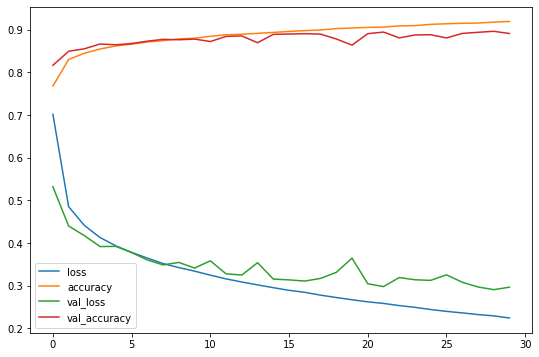

In [102]:
history.plot(figsize=(9,6))

In [103]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 75.3439 - accuracy: 0.8356


[75.34390258789062, 0.8356000185012817]

Now, use the model to make predictions. 

In [107]:
# predict method gives the probabilities of each class
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [111]:
# predict_classes() method directly gives the class with the highest probability

y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1])

In [117]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

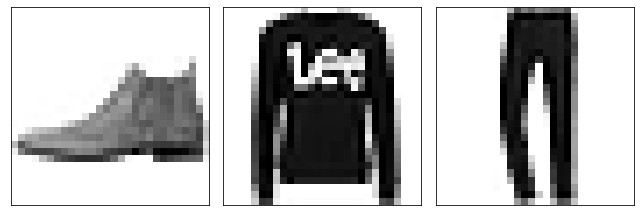

In [123]:
fig, axs = plt.subplots(1,3, figsize=(9,4),
                        subplot_kw={'xticks': [], 'yticks': []})

actual_images = X_test[:3]

for i, ax in enumerate(axs.flat):
  ax.imshow(actual_images[i], cmap='gray_r')

plt.tight_layout()
plt.show()

In this case, all three predictions are correct